# Ch. 2 HW - Kevin Daum

1-3, 7, 16, 26; 27, 47

In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

## 1.

a. Yes, the conclusion is warranted because the 95% confidence interval for the slope does not include zero. The implied level of significance is 95% confidence, or $\alpha=0.05$.

b. The scope of the model doesn't include X=0 since an area with a population of zero has no meaning. The model should only be used for populations close to those in the sample data. 

## 2.

No. Since $H_0$ is $\beta_1 \le 0$, $\beta_1$ could be negative, which would mean there _is_ a linear relationship. 

## 3. 

The negative slope would seem to imply that, and the high $P$-value indicates that the estimate for the slope is correct. However, the slope is close to zero, especially when compared with the intercept (which is a valid comparison as long as X and Y have the same unit), so it may in fact be true that there is no linear statistical association between X and Y.

## 7.

a. So, we're looking for a 99% confidence interval for $\beta_1$. First, let's load in the data:

In [2]:
df7 = pd.read_table('/Users/kevin/Dropbox/School/STA-580/ch1hw/Ch1-22.csv', sep=',', index_col=False)
df7.head()  # shows the first few rows of the data

,hardness,time
0,199,16
1,205,16
2,196,16
3,200,16
4,218,24


/Users/kevin/envs/stats3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


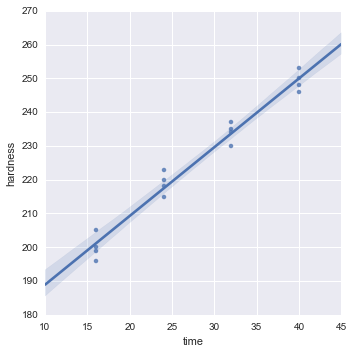

In [3]:
# let's see what the data looks like
sns.lmplot('time', 'hardness', df7)

In [4]:
# perform the least-squares linear regression
y7 = df7.hardness
x7 = df7.time
x7 = sm.add_constant(x7) # add constant term to predictor so we can fit the intercept
result7 = sm.OLS(y7, x7).fit()
result7.summary(title='Plastic Hardness Linear Regression', alpha=0.01)

/Users/kevin/envs/stats3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Plastic Hardness Linear Regression                      
==============================================================================
Dep. Variable:               hardness   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           2.16e-12
Time:                        16:18:38   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [99.0% Conf. Int.]
------------------------------------------------------------------------------
const        168.6000      2.657     63.454      0.000       160.690   176.510
time           2.0344      0.090     22.506      0.000         1.765     2.303
==============================================================================
Omnibus:                        0.955   Durbin-Watson:                   2.466
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.711
Skew:                           0.068   Prob(JB):                        0.701
Kurtosis:                       1.976   Cond. No.                         96.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As can be seen in the output above, the 99% confidence interval for $\beta_1$ is (1.765, 2.303). I believe the textbook wants me to interpret this like so: if we take many independent samples and a 99% CI is constructed for each sample, 99% of those intervals will contain the true value of $\beta_1$. 

In my searching the web to confirm the book's definition of a confidence interval, I came across some interesting discussions (http://stats.stackexchange.com/questions/11609/clarification-on-interpreting-confidence-intervals, http://stats.stackexchange.com/questions/6652/what-precisely-is-a-confidence-interval/6801#6801, http://stats.stackexchange.com/questions/2356/are-there-any-examples-where-bayesian-credible-intervals-are-obviously-inferior-t/6373#6373) which seem to center on Bayesian vs. Frequentist approaches (philosophies?). I think this is beyond my current level of statistical maturity so I'm just going to go with what the book says. 

b. 

The alternatives are:

$$H_0: \beta_1 = 2$$
$$H_a: \beta_1 \ne 2$$

and the appropriate test statistic is:

$$ t^* = \frac{b_1 - \beta_1}{s\{b_1\}} = \frac{2.0344 - 2}{0.0904}$$

The decision rule is:

$$\text{If } \lvert t^* \rvert \le t(1-\alpha/2;n-2)\text{, conclude } H_0$$
$$\text{If } \lvert t^* \rvert > t(1-\alpha/2;n-2)\text{, conclude } H_a$$

Since $\alpha=0.01$, we need $t(0.995; 14)$:

In [5]:
b1 = 2.0344
b0 = 168.6000
sb1 = 0.0904

t_crit7 = st.t.ppf(0.995,14)
print(t_crit7)
t_star7 = (b1 - 2)/sb1
print(t_star7)

2.97684273411
0.38053097345132975


Since $\lvert 0.381 \rvert < 2.977$, we conclude $H_0$. The standard is being satisfied.

I'm not sure how to find this P-value, but I'll take a crack at it. I think the one-sided P-value = $P\{t(14) > t^* = 0.382\}$. To calculate this probability, I should just be able to use the t distribution:

In [6]:
p7 = st.t.sf(t_star7, result7.nobs)
p7

0.35427797630168878

In [7]:
# this should be the same as 1 - cdf
1 - st.t.cdf(t_star7, result7.nobs)

0.35427797630168878

In [8]:
p7 = 2*p7
p7

0.70855595260337756

So, the two-sided P-value = 0.707. 

c. 

I can't see the table the text is referring to on pp. 50-51, so I'm going to try to find another way to calculate power.

In [9]:
import statsmodels.stats.power as smp

d7 = 0.3/.1  # noncentrality measure
print(d7)
power7 = smp.ttest_power(d7, nobs=16, alpha=0.01, alternative='two-sided')
power7

2.9999999999999996


1.0

Is it even posssible to have a power of 1.0? Perhaps because we know the standard is being exceeded, I should be doing a one-sided "larger" test:

In [10]:
power7_2 = smp.ttest_power(d7, nobs=16, alpha=0.01, alternative='larger')
power7_2

1.0

I now have table B5. I have df=14, $\delta = 3.0$, $\alpha = 0.01$, and $\sigma\{b_1\} = 0.1$. For these values, table B5 reports the two-sided power value as 0.53. This disagrees with what `statsmodels.stats.power.ttest_power()` returned. I'm going to go with the result from the table, since that seems more likely to be correct.

## 16.

Relevant MINITAB output:

    Prediction for Y 

    Regression Equation

    Y = 168.60 + 2.0344 X


    Variable  Setting
    X              30


        Fit    SE Fit        98% CI              98% PI
    229.631  0.828473  (227.457, 231.806)  (220.869, 238.393)

a. (227.457, 231.806). If we collected 100 random samples at X=30 hours and constructed a 98 percent confidence interval for mean hardness for each sample, 98 of them will contain the true value of the mean hardness for X=30 hours. 

b. (220.869, 238.393)

c. From the text we have
$$ \hat Y_h \pm t(1-\alpha/2;n-2)s\{\text{predmean}\} \tag{2.39}$$
and
$$ s^2\{\text{predmean}\} = \frac{MSE}{m} + s^2\{\hat Y_h\} \tag{2.39a}$$
and 
$$ s^2\{\hat Y_h\} = MSE\left[\frac{1}{n} + \frac{(X_h-\bar X)^2}{\sum (X_i-\bar X)^2}\right] $$

Relevant MINITAB output:

    Analysis of Variance

    Source         DF   Seq SS  Contribution   Adj SS   Adj MS  F-Value  P-Value
    Regression      1  5297.51        97.31%  5297.51  5297.51   506.51    0.000
    Error          14   146.43         2.69%   146.43    10.46
    Total          15  5443.94       100.00%

From that table, we see that $MSE = 10.46$. 

$m=3$

Using Minitab, I found that $\bar X = 28$ and $\sum (X_i - \bar X)^2 = 1280$. We also know $n=16$ and $X_h=30$. 

In [11]:
alpha16 = 0.02
mse16 = 10.46
m16 = 3
xbar16 = 28
xdevsum16 = 1280
n16 = 16
xh16 = 30
varyh16 = mse16*(1/n16 + (xh16-xbar16)**2/xdevsum16)
print(varyh16)
syh16 = np.sqrt(varyh16)
print(syh16)

0.6864375
0.828515238242


I see that the square root of the variance of $\hat Y_H$ is the "SE Fit" value reported by Minitab for $X_h=30$ (above). Now, let's find this prediction interval:

In [12]:
tcrit16 = st.t.isf(alpha16/2, n16-2)  # t.isf is inverse of (1-CDF)
tcrit16

2.6244940675602315

In [13]:
spredmean16 = np.sqrt(mse16/m16 + varyh16)
yhatx30_16 = 229.631
predintx30_16 = (yhatx30_16 - tcrit16*spredmean16, yhatx30_16 + tcrit16*spredmean16)
print(predintx30_16)

(224.26963705802697, 234.99236294197303)


d. Yes, the prediction interval for the mean of ten test items is narrower than the prediction interval for a single new item. This is expected. It's also wider than the confidence interval for $X_h=30$, which is also expected.

e. To use (2.40) and (2.40a) I need to find $W$, which means I need to find $F(1-\alpha;2, n-2)$.

In [14]:
f16 = st.f.ppf(1-alpha16, 2, n16)  # f.ppf is the F percent point function (inverse of CDF)
f16

5.0455152716264742

In [15]:
w16 = np.sqrt(2*f16)
w16

3.1766382455754933

Substituting all these values into (2.40) we can get the boundary values:

In [16]:
confbandx30_16 = (yhatx30_16 - w16*syh16, yhatx30_16 + w16*syh16)
confbandx30_16

(226.99910680715683, 232.26289319284317)

Yes, the confidence ban is and always will be wider than the confidence interval at any given point, as noted at the top of Kutner p. 62.

## 26.

a. 

In [17]:
cor_for_mean26 = n16*df7.hardness.mean()**2
cor_for_mean26

814055.0625

In [18]:
sstou26 = sum([x**2 for x in df7.hardness])
sstou26

819499

    Analysis of Variance

    Source                 DF     Seq SS  Contribution   Adj SS   Adj MS  F-Value  P-Value
    Regression              1    5297.51        97.31%  5297.51  5297.51   506.51    0.000
    Error                  14     146.43         2.69%   146.43    10.46
    Total                  15    5443.94       100.00%
    
    Correction for mean     1  814055.06
    Total, uncorrected     16  819499

b. 
$\alpha=0.01$
$$H_0: \beta_1 = 0$$
$$H_a: \beta_1 \ne 0$$ 

From the ANOVA table above we can see that $F^*=506.51$. The decision rule is as follows:

$$ \text{If } F^* \le F(1-\alpha;1,n-2)\text{, conclude } H_0$$
$$ \text{If } F^* > F(1-\alpha;1,n-2)\text{, conclude } H_a$$

So, the test statistic for our case is:

In [19]:
ftest26 = st.f.ppf(1-0.01, 1, n16-2)
ftest26

8.8615926651764241

Since 506.51 > 8.86, we conclude $H_a$, or that the data suggests a linear relationship. 

c. 

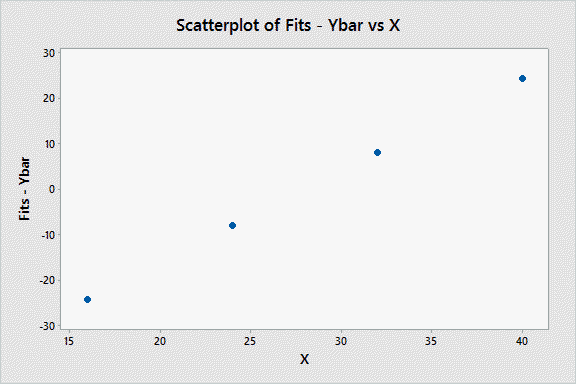

In [20]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch2hw/Scatterplot-of-Fits-Ybar-vs-X.png')

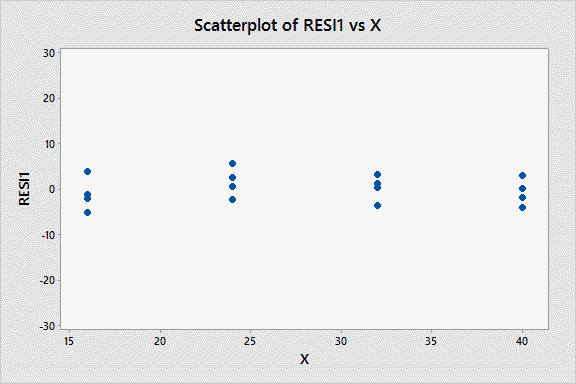

In [21]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch2hw/Scatterplot-of-RESI1-vs-X.png')

<!---
![Yhat - YBar vs. X](/Users/kevin/Dropbox/School/STA-580/ch2hw/Scatterplot-of-Fits-Ybar-vs-X.png)

![Y - Yhat](/Users/kevin/Dropbox/School/STA-580/ch2hw/Scatterplot-of-RESI1-vs-X.png)


![Yhat - YBar vs. X](files/Scatterplot-of-Fits-Ybar-vs-X.png)

![Y - Yhat](files/Scatterplot-of-RESI1-vs-X.png)
-->

SSR appears to be the larger component of SSTO. This means that the regression explains the variation in Y, which implies a linear relationship, which implies that $R^2$ will be high. 

d. From the "Plastic Hardness Linear Regression" summary table above, we see that $R^2=0.973$ and therefore $r=\pm \sqrt R^2$:

In [22]:
np.sqrt(0.973)

0.98640762365261547

Since $\beta_1$ is positive, $r$ is positive. So $r=0.986$. 

## 27.

Let's pull in the data and plot it first, because you should always do that first, right?

/Users/kevin/envs/stats3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


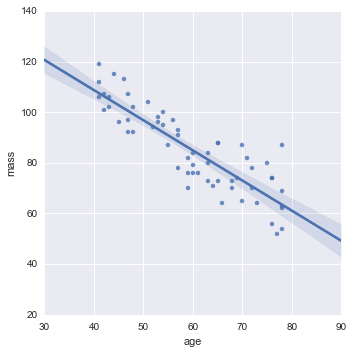

In [23]:
df27 = pd.read_excel(io='file:///Users/kevin/Dropbox/School/STA-580/ch2hw/Ch1.27 data.xlsx')
sns.lmplot('age', 'mass', df27)

There's obviously a linear relationship here, at least for this age range. Question is, how strong is it?

a. 

In [25]:
y27 = df27.mass
x27 = df27.age
x27 = sm.add_constant(x27)
results27 = sm.OLS(y27, x27).fit()
results27.summary(title='Body Mass vs. Age Linear Regression', alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Body Mass vs. Age Linear Regression                      
==============================================================================
Dep. Variable:                   mass   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           4.12e-19
Time:                        16:19:03   Log-Likelihood:                -210.17
No. Observations:                  60   AIC:                             424.3
Df Residuals:                      58   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        156.3466      5.512     28.363      0.000       145.313   167.381
age           -1.1900      0.090    -13.193      0.000        -1.371    -1.009
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.208
Skew:                           0.319   Prob(JB):                        0.547
Kurtosis:                       2.726   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ H_0: \beta_1 \ge 0$$
$$ H_a: \beta_1 < 0$$

From the results above we can see $t^*=-13.19$. We require $t(1-0.05,58)$:

In [26]:
tcrit27 = st.t.isf(0.95,results27.nobs-2)
tcrit27

-1.6715527621536721

If $t^8 > -1.67$, we conclude $H_0$, else $H_a$. Since -13.19 < -1.67, we conclude $H_a$. The P-value is 0+. 

b. Absolutely not! The human body begins very small and doesn't reach full size until around 25 years old, so body mass over the entire lifespan would have to be modeled piece-wise. It would have a positive slope from birth to around age 20-30. 

c.

In [27]:
df27.age.min(), df27.age.max()

(41, 78)

Based on this model, which is valid for women ages 41-78, a woman will lose 1.01 to 1.37 units of muscle mass each year with 95% confidence (see confidence interval for row 'age' in results summary above) . Based on the numbers, I am assuming the unit is pounds. It is not necessary to know the exact age, as long as it is within the age range of the sample data, because this is a linear model. The slope is fixed across the entire range.

## 47.

a. Using the formula for Pearson product-moment correlation coefficient (2.84):

In [28]:
r12_47_num = sum([(row[1].age - df27.age.mean())*(row[1].mass - df27.mass.mean()) 
                  for row in df27.iterrows()])
r12_47_den = (sum([(row[1].age - df27.age.mean())**2 for row in df27.iterrows()]) * 
              sum([(row[1].mass - df27.mass.mean())**2 for row in df27.iterrows()]))**0.5
r12_47 = r12_47_num / r12_47_den
r12_47

-0.86606398132047424

Let's see if we get the same result using scipy.stats:

In [29]:
st.pearsonr(df27.age, df27.mass)

(-0.86606398132047413, 4.1239869016725787e-19)

The first value above is $r_{12}$, the second is a two-tailed P-value. So yes, we got the correct value!

$r_{12} = -0.866$

b. 

Alternatives: 

$$H_0: \rho_{12} = 0 \text{  ($Y_1$ and $Y_2$ are statistically independent)}$$
$$H_a: \rho_{12} \ne 0$$

Decision rule based on test statistic (2.87) is (2.88):

$$\text{If } \lvert t^* \rvert \le t(1-\alpha/2;n-2)\text{, conclude } H_0$$
$$\text{If } \lvert t^* \rvert > t(1-\alpha/2;n-2)\text{, conclude } H_a$$

Using (2.87):

In [30]:
tstar47 = (r12_47 * np.sqrt(results27.nobs - 2)) / np.sqrt(1 - r12_47**2)
tstar47

-13.193256811621596

In [31]:
alpha47 = 0.05
tcrit47 = st.t.isf(alpha47/2, results27.nobs-2)
tcrit47

2.0017174830120927

Since 13.2 > 2.0, we reject $H_0$. Muscle mass and age are _not_ statistically independent.

c. 

I've been spending my whole Saturday on these last two problems and I miss my family, so let's go right to `scipy.stats` this time:

In [32]:
rs47 = st.spearmanr(df27.age, df27.mass)
print(rs47)
rs47 = rs47[0]
rs47

SpearmanrResult(correlation=-0.86572174383370593, pvalue=4.4188814356061015e-19)


-0.86572174383370593

$r_S = -0.866$. 

d. 

Using (2.101):

In [33]:
tstar_spearman47 = (rs47 * np.sqrt(results27.nobs - 2)) / np.sqrt(1 - rs47**2)
tstar_spearman47

-13.172434253302704

Alternatives: 

$H_0$: There is no association between $Y_1$ and $Y_2$  
$H_a$: There is an association between $Y_1$ and $Y_2$

Decision rule based on test statistic (2.101) is:

$$\text{If } \lvert t^* \rvert \le t(1-\alpha/2;n-2)\text{, conclude } H_0$$
$$\text{If } \lvert t^* \rvert > t(1-\alpha/2;n-2)\text{, conclude } H_a$$

Since $\alpha$ is still 0.05, we again require t = 2.00. Since 13.2 > 2.00, we reject $H_0$. There is an association between $Y_1$ and $Y_2$. 

e. 

The results and conclusions are identical since $t^*=-13.2$ in both cases.